# Alumno: Gerardo de Miguel González

## Minería de Datos (Master en Data Science, UIMP-UC) 

## Profesores: Steven Van Vaerenbergh, Rodrigo G. Manzanas, Joaquín Bedia y Sixto Herrera

# Tarea 2. Problemas de Clasificación - Reducción de la Dimensión

En la presente tarea consideraremos el dataset `meteo.csv`, que podéis descargaros en el GitHub dedicado a este Máster ([meteo.csv](https://github.com/SantanderMetGroup/Master-Data-Science/blob/master/Data_mining/datasets/meteo.csv.)) y que ha sido utilizado en diferentes sesiones prácticas. Dicho dataset contiene en la primera columna el valor de precipitación observado en Lisboa en el periodo 1979-2008 mientras que en las restantes contiene los valores observados de diferentes variables atmosféricas en 40 puntos que cubren aproximadamente la Península Ibérica. Dichas variables serán los `predictores` del modelo mientras que la precipitación será nuestra variable objetivo. En particular los predictores son:

* Altura geopotencial en 500 hPa (columnas 2:41),
* Temperatura del aire en 850 hPa (columnas 42:81), 700 hPa (columnas 82:121) y 500 hPa (columnas 122:161), 
* Temperatura del aire en superficie (columnas 162:201),
* Humedad específica del aire en 850 hPa (columnas 202:241) y 500 hPa (columnas 242:281) y 
* Presión al nivel del mar (columnas 282:321)

Para establecer el problema de clasificación consideraremos dos umbrales de discretización, 1 mm y 20 mm, que definen la ocurrencia de precipitación (Wet days) y de precipitaciones intensas (Very heavy precipitation days), respectivamente. Puedes consultar más detalles de la definición en la web de [ECA&D](https://www.ecad.eu//indicesextremes/indicesdictionary.php).

Para el desarrollo de la tarea se permitirá el uso de todo el material incluido en el Moodle de las asignatura así como el desarrollado por el alumno durante la realización de las prácticas.

La entrega consisitirá de un notebook de Jupyter ó un R-MarkDown, junto con el archivo html que éste genera. Ambos ficheros se entregarán a través del Moodle de la asignatura en la tarea correspondiente.

## Punto 1 (3 puntos):

En esta primera parte de la tarea trataremos de ilustrar parte de los problemas reflejados en las sesiones teórico-prácticas planteando diferentes experimentos con el dataset `meteo.csv`.
En primer lugar, considerar el dataset completo incluyendo tanto las variables predictoras como la variable objetivo. 

### Dataset Completo

In [1]:
#::GMG::Obtengo el dataset del repositorio Github de Santander MetGroup (versión raw)
meteo <- read.csv(url(
    'https://raw.githubusercontent.com/SantanderMetGroup/Master-Data-Science/master/Data_mining/datasets/meteo.csv')
)

In [2]:
#::GMG::Descripción básica mínima del dataset
# https://rveryday.wordpress.com/2016/11/29/examine-a-data-frame-in-r-with-7-basic-functions/
dim(meteo)

[1] 10958   322

In [3]:
colnames(meteo)

[1] "X"    "y"    "X1"   "X2"   "X3"   "X4"   "X5"   "X6"   "X7"   "X8"  
 [11] "X9"   "X10"  "X11"  "X12"  "X13"  "X14"  "X15"  "X16"  "X17"  "X18" 
 [21] "X19"  "X20"  "X21"  "X22"  "X23"  "X24"  "X25"  "X26"  "X27"  "X28" 
 [31] "X29"  "X30"  "X31"  "X32"  "X33"  "X34"  "X35"  "X36"  "X37"  "X38" 
 [41] "X39"  "X40"  "X41"  "X42"  "X43"  "X44"  "X45"  "X46"  "X47"  "X48" 
 [51] "X49"  "X50"  "X51"  "X52"  "X53"  "X54"  "X55"  "X56"  "X57"  "X58" 
 [61] "X59"  "X60"  "X61"  "X62"  "X63"  "X64"  "X65"  "X66"  "X67"  "X68" 
 [71] "X69"  "X70"  "X71"  "X72"  "X73"  "X74"  "X75"  "X76"  "X77"  "X78" 
 [81] "X79"  "X80"  "X81"  "X82"  "X83"  "X84"  "X85"  "X86"  "X87"  "X88" 
 [91] "X89"  "X90"  "X91"  "X92"  "X93"  "X94"  "X95"  "X96"  "X97"  "X98" 
[101] "X99"  "X100" "X101" "X102" "X103" "X104" "X105" "X106" "X107" "X108"
[111] "X109" "X110" "X111" "X112" "X113" "X114" "X115" "X116" "X117" "X118"
[121] "X119" "X120" "X121" "X122" "X123" "X124" "X125" "X126" "X127" "X128"
[131] "X129" "X130" "X131" "X132" "X133" "X134" "X135" "X136" "X137" "X138"
[141] "X139" "X140" "X141" "X142" "X143" "X144" "X145" "X146" "X147" "X148"
[151] "X149" "X150" "X151" "X152" "X153" "X154" "X155" "X156" "X157" "X158"
[161] "X159" "X160" "X161" "X162" "X163" "X164" "X165" "X166" "X167" "X168"
[171] "X169" "X170" "X171" "X172" "X173" "X174" "X175" "X176" "X177" "X178"
[181] "X179" "X180" "X181" "X182" "X183" "X184" "X185" "X186" "X187" "X188"
[191] "X189" "X190" "X191" "X192" "X193" "X194" "X195" "X196" "X197" "X198"
[201] "X199" "X200" "X201" "X202" "X203" "X204" "X205" "X206" "X207" "X208"
[211] "X209" "X210" "X211" "X212" "X213" "X214" "X215" "X216" "X217" "X218"
[221] "X219" "X220" "X221" "X222" "X223" "X224" "X225" "X226" "X227" "X228"
[231] "X229" "X230" "X231" "X232" "X233" "X234" "X235" "X236" "X237" "X238"
[241] "X239" "X240" "X241" "X242" "X243" "X244" "X245" "X246" "X247" "X248"
[251] "X249" "X250" "X251" "X252" "X253" "X254" "X255" "X256" "X257" "X258"
[261] "X259" "X260" "X261" "X262" "X263" "X264" "X265" "X266" "X267" "X268"
[271] "X269" "X270" "X271" "X272" "X273" "X274" "X275" "X276" "X277" "X278"
[281] "X279" "X280" "X281" "X282" "X283" "X284" "X285" "X286" "X287" "X288"
[291] "X289" "X290" "X291" "X292" "X293" "X294" "X295" "X296" "X297" "X298"
[301] "X299" "X300" "X301" "X302" "X303" "X304" "X305" "X306" "X307" "X308"
[311] "X309" "X310" "X311" "X312" "X313" "X314" "X315" "X316" "X317" "X318"
[321] "X319" "X320"

In [4]:
#::GMG::La variable X es un índice que NO necesitamos
str(meteo$X)

 int [1:10958] 1 2 3 4 5 6 7 8 9 10 ...


In [5]:
meteo$X <- NULL

In [6]:
#::GMG::Veo si hay 'missing values'
# https://stackoverflow.com/questions/42079756/testing-for-missing-values-in-r
# https://stackoverflow.com/questions/24027605/determine-the-number-of-na-values-in-a-column
sum(is.na(meteo))

[1] 0

In [7]:
#::GMG::Tengo el dataset completo (y + Xn ...)
head(x = meteo,n = 5)

y,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320
10.9,57042.96,56534.84,55884.40,55175.59,54458.21,56980.27,56460.59,55800.02,55051.15,⋯,101985.9,101627.3,101357.2,101110.7,101291.0,101814.9,101479.4,101164.5,100970.7,100905.3
0.6,56963.20,56493.45,55930.82,55340.20,54768.63,56856.57,56361.95,55776.76,55164.26,⋯,102048.1,102069.7,102204.5,102480.3,102858.8,101973.3,102033.3,102165.5,102323.9,102534.2
13.0,56522.59,55971.40,55304.34,54498.03,53725.15,56514.84,55977.71,55327.28,54569.78,⋯,102399.1,102448.4,102438.3,102434.3,102339.8,102669.7,102565.5,102530.3,102453.6,102487.1
0.0,54627.98,53979.80,53494.05,53072.98,52616.36,54776.17,54089.05,53516.98,53012.86,⋯,100970.0,100672.8,100360.7,100133.7,100028.4,101126.2,100700.0,100381.3,100118.3,100319.8
0.0,53584.38,53391.01,53310.38,53292.82,53340.13,53781.70,53498.13,53306.82,53213.26,⋯,100652.7,100663.5,100747.7,100934.0,101015.8,100801.6,100685.3,100777.5,100909.4,101164.7


### PCA

Por un lado, calculad las componentes principales con y sin estandarización (`Nota:` consultar la ayuda de la función scale -> `? scale`):

#### Sin Estandarización

**::GMG::** *Performing PCA on un-normalized variables will lead to insanely large loadings for variables with high variance. In turn, this will lead to dependence of a principal component on the variable with high variance.*

https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/

In [8]:
#::GMG::Componentes principales sin estandarización
# https://www.rdocumentation.org/packages/stats/versions/3.5.2/topics/prcomp
pca_full <- prcomp(meteo, center = F, scale. = F)

In [9]:
#::GMG::Qué es lo que nos devuelve la función prcomp()
# https://www.rdocumentation.org/packages/stats/versions/3.5.2/topics/prcomp
names(pca_full)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [10]:
#::GMG::Detalles de los componentes del objeto
str(pca_full)

List of 5
 $ sdev    : num [1:321] 735142 5956 2139 1764 953 ...
 $ rotation: num [1:321, 1:321] -2.68e-06 -7.68e-02 -7.66e-02 -7.64e-02 -7.61e-02 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:321] "y" "X1" "X2" "X3" ...
  .. ..$ : chr [1:321] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : logi FALSE
 $ scale   : logi FALSE
 $ x       : num [1:10958, 1:321] -732849 -735023 -732768 -720715 -722778 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:321] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [11]:
#::GMG::Descipción
# https://www.rdocumentation.org/packages/stats/versions/3.5.2/topics/prcomp
# sdev : the standard deviations of the principal components 
#        (the square roots of the eigenvalues)
head(pca_full$sdev)

[1] 735141.8237   5955.6982   2139.4331   1764.2568    952.8071    750.6798

In [21]:
#::GMG::Descipción
# https://www.rdocumentation.org/packages/stats/versions/3.5.2/topics/prcomp
# rotation : the matrix of variable loadings (columns are eigenvectors)
#::nota:: 
dim(pca_full$rotation)
#::GMG::Vemos las tres primeras PC's ...
head(pca_full$rotation[,1:3],n = 25)

[1] 321 321

,PC1,PC2,PC3
y,-2.684716e-06,-0.0001886918,-0.0009897637
X1,-7.684453e-02,0.1010646209,0.0776125757
X2,-7.661460e-02,0.1068251384,0.1421700213
X3,-7.637951e-02,0.1108133817,0.2044587993
X4,-7.612812e-02,0.1121129705,0.2579488300
X5,-7.584893e-02,0.1100942639,0.2968685174
X6,-7.684080e-02,0.1123274633,0.0430893174
X7,-7.659804e-02,0.1187033236,0.1026272120
X8,-7.635437e-02,0.1228686495,0.1617827354
X9,-7.609918e-02,0.1239788418,0.2133231757


In [25]:
apply(pca_full$rotation[,1:3],2,which.min)

PC1 PC2 PC3 
300 292  37

In [26]:
pca_full$rotation[300,1]

[1] -0.1386123

In [13]:
#::GMG::Descipción
# https://www.rdocumentation.org/packages/stats/versions/3.5.2/topics/prcomp
# center, scale : the centering and scaling used, or FALSE
head(pca_full$center)

[1] FALSE

In [14]:
#::GMG::Descipción
# https://www.rdocumentation.org/packages/stats/versions/3.5.2/topics/prcomp
# center, scale : the centering and scaling used, or FALSE
head(pca_full$scale)

[1] FALSE

In [15]:
#::GMG::Descripción
# the matrix x has the principal component score vectors
dim(pca_full$x)
head(pca_full$x)

[1] 10958   321

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC312,PC313,PC314,PC315,PC316,PC317,PC318,PC319,PC320,PC321
-732849.3,-4318.727,-566.6576,-5253.545,198.99395,1370.0623,-265.2671,-324.062897,-71.57965,194.5624,⋯,6.627001e-05,-1.878125e-05,-1.764898e-05,-3.934216e-05,-3.902992e-05,1.264160e-05,-2.885566e-05,1.105663e-05,1.821435e-05,8.069013e-06
-735023.1,-7079.299,1098.5472,-3325.102,92.26792,3034.3218,1388.6505,190.772714,-223.46657,708.2366,⋯,-1.187805e-05,-2.095601e-05,-4.402077e-06,-1.237993e-05,-1.061986e-05,6.017403e-06,-2.103580e-05,9.716846e-06,-2.041931e-06,1.970142e-05
-732768.3,-5706.424,-2636.0316,-2243.940,-2690.01957,2628.1781,1002.8926,839.668765,29.28938,320.8326,⋯,4.440990e-05,-4.409904e-05,7.215691e-06,-3.846457e-06,6.539126e-05,3.124744e-05,-3.418006e-05,9.313150e-06,-3.964534e-05,2.475620e-05
-720715.5,-8569.298,-4127.9983,-2710.049,-82.28401,517.8777,-732.9244,283.690618,-95.38063,-103.4086,⋯,-6.376249e-06,-2.741973e-05,1.168093e-05,2.341700e-06,-9.952860e-06,-1.243537e-05,-7.493491e-06,-5.165990e-06,1.656943e-05,-7.477284e-06
-722777.8,-9319.085,-2987.5988,1229.049,2130.26408,872.3628,-357.3961,-64.669783,285.64995,280.1793,⋯,-2.592606e-05,1.523078e-05,-8.202729e-05,-2.898765e-05,-4.466733e-05,-5.227296e-05,-8.718317e-06,-1.157515e-05,-2.431129e-05,1.720853e-05
-731180.5,-6607.198,-807.1356,3341.545,2540.07633,1399.1549,-167.5435,5.246512,270.17790,481.1771,⋯,9.571874e-06,-8.869726e-06,2.418042e-05,-8.827042e-06,1.831745e-05,8.237644e-06,1.721096e-05,1.086608e-05,2.732263e-06,-1.211056e-06


In [16]:
#::GMG::Calculamos el porcentaje acumulado de varianza
# Eigenvalues
eig <- (pca_full$sdev)^2

# Variances in percentage
variance <- eig*100/sum(eig)

# Cumulative variances
cumvar <- cumsum(variance)

#::GMG::Lo meto en un DataFrame para ponerlo bonito :)
eig_meteo <- data.frame(eig = eig, 
                        variance = variance,
                        cumvariance = cumvar)

head(eig_meteo)

eig,variance,cumvariance
5.404335e+11,9.999157e+01,99.99157
3.547034e+07,6.562760e-03,99.99814
4.577174e+06,8.468736e-04,99.99898
3.112602e+06,5.758969e-04,99.99956
9.078413e+05,1.679698e-04,99.99973
5.635202e+05,1.042631e-04,99.99983


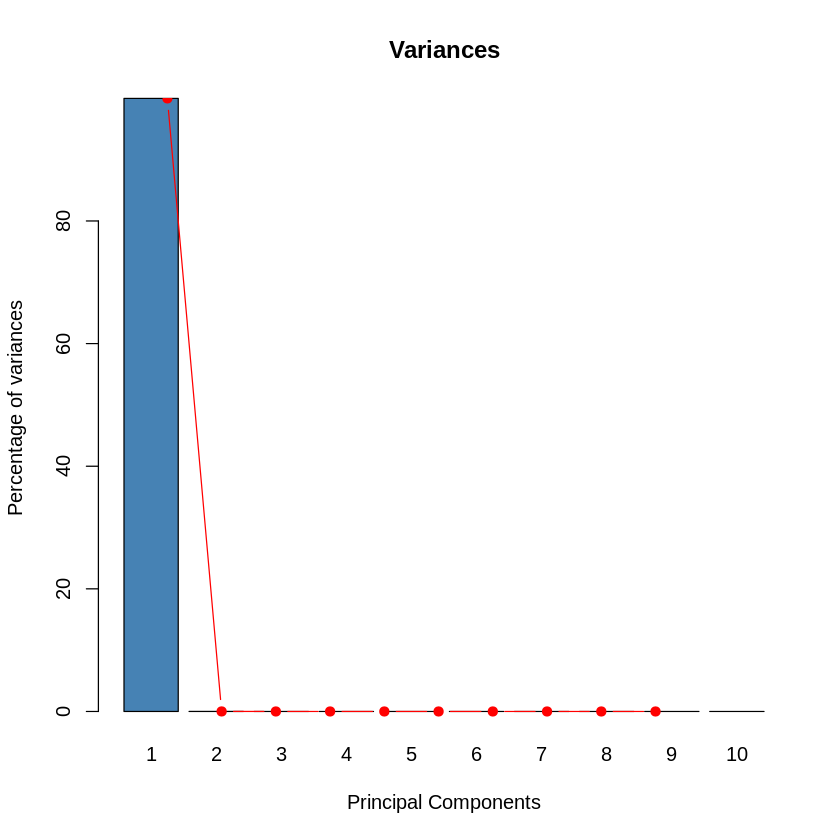

In [87]:
#::GMG::Pintamos el scree plot de las 10 primeras PCs
barplot(eig_meteo[1:10, 2], names.arg=1:10, 
       main = "Variances",
       xlab = "Principal Components",
       ylab = "Percentage of variances",
       col ="steelblue")
lines(x = 1:10, 
      eig_meteo[1:10, 2], 
      type="b", pch=19, col = "red")

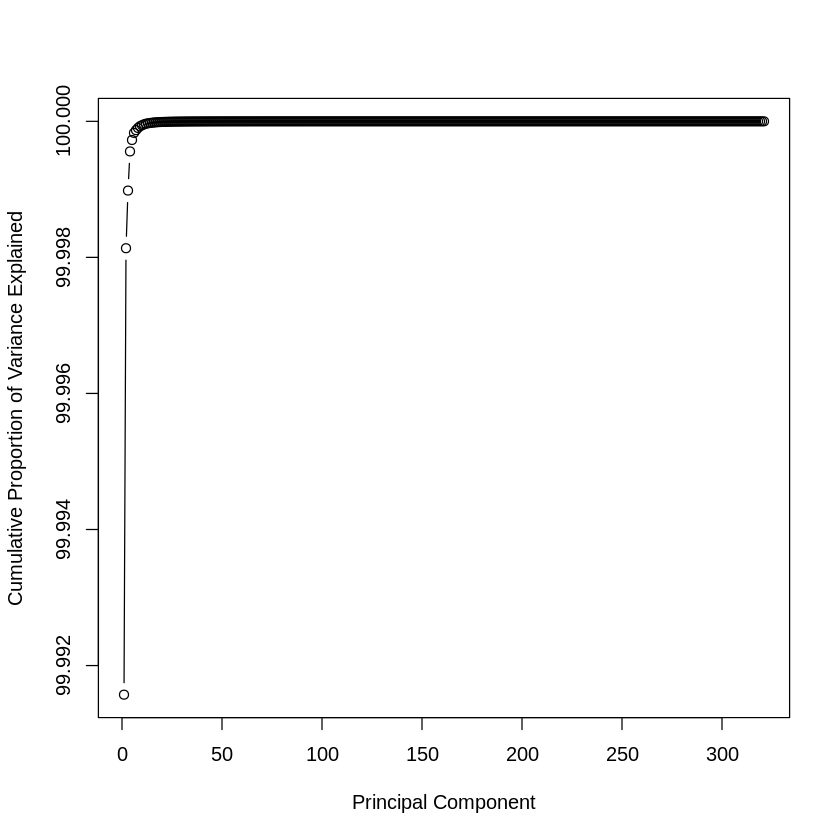

In [37]:
#::GMG:: cumulative scree plot
plot(cumsum(variance), 
            xlab = "Principal Component",
            ylab = "Cumulative Proportion of Variance Explained",
            type = "b")

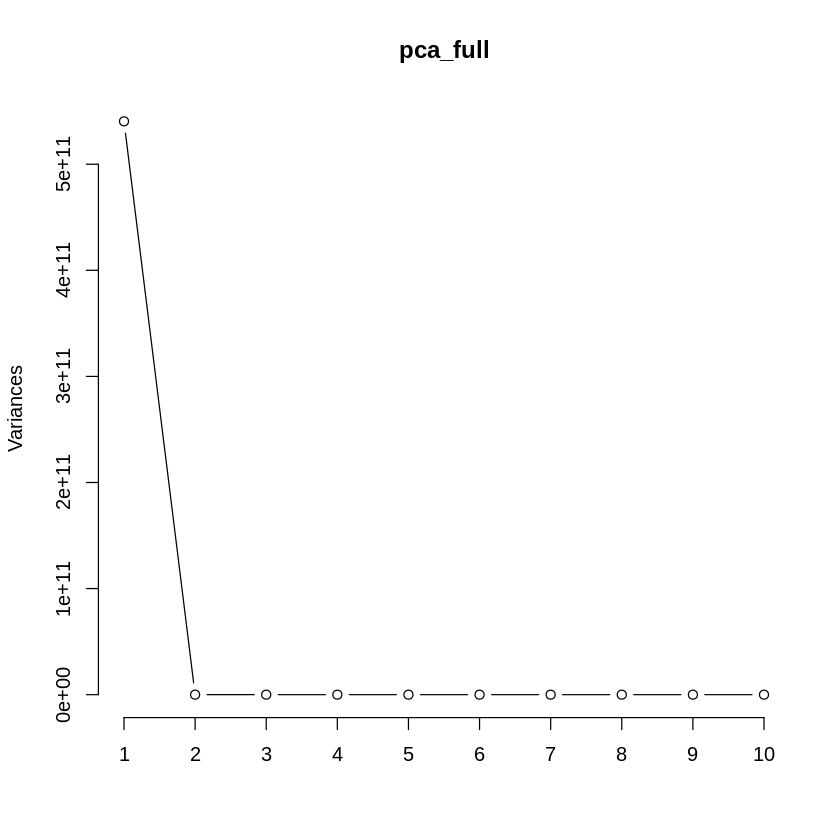

In [17]:
#::GMG::Directamente con el objeto que nos devuelve prcomp() sin poercentaje
plot(pca_full, type='l')

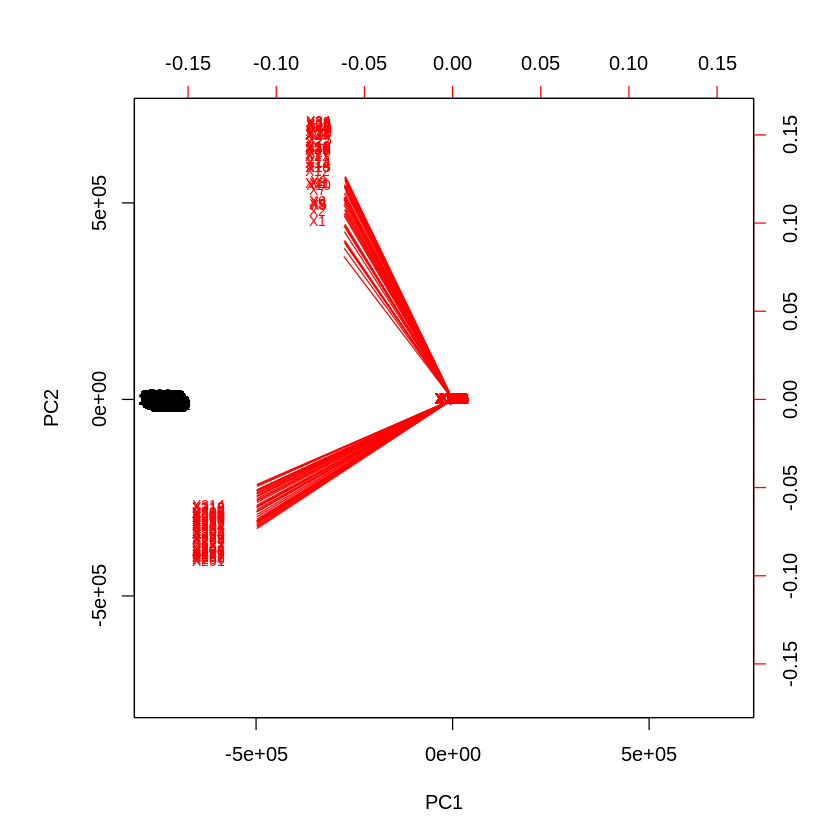

In [33]:
#::GMG::Biplot 
#
biplot(pca_full, scale = 0, arrow.len = 0, cex=.7)

#### Con estandarización

In [38]:
#::GMG::Lo hacemos con scale
pca_full_scaled <- prcomp(meteo, center = TRUE, scale. = TRUE)

In [39]:
names(pca_full_scaled)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [40]:
str(pca_full_scaled)

List of 5
 $ sdev    : num [1:321] 13.65 7.13 3.54 3 2.78 ...
 $ rotation: num [1:321, 1:321] -0.0103 0.0574 0.0557 0.0536 0.0509 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:321] "y" "X1" "X2" "X3" ...
  .. ..$ : chr [1:321] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:321] 1.99 56484.48 56314.62 56141.12 55955.86 ...
  ..- attr(*, "names")= chr [1:321] "y" "X1" "X2" "X3" ...
 $ scale   : Named num [1:321] 6.26 1070.29 1123.64 1174.56 1226.69 ...
  ..- attr(*, "names")= chr [1:321] "y" "X1" "X2" "X3" ...
 $ x       : num [1:10958, 1:321] -8.29 -15.14 -11.26 -15.86 -19.4 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:321] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [41]:
head(pca_full_scaled$sdev)

[1] 13.650925  7.131345  3.543784  2.995060  2.784428  2.650215

In [42]:
dim(pca_full_scaled$rotation)
head(pca_full_scaled$rotation)

[1] 321 321

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC312,PC313,PC314,PC315,PC316,PC317,PC318,PC319,PC320,PC321
y,-0.01033838,0.03849341,0.063976303,-0.02371934,0.01274300,-0.089003828,0.015827878,-0.08354051,0.083537382,-0.01778078,⋯,-4.729933e-05,-3.586429e-06,-5.421114e-05,-3.477941e-05,-1.218937e-05,-4.448995e-05,-1.308973e-05,-1.105378e-05,-0.0000255699,-5.018065e-06
X1,0.05741723,-0.06124949,-0.005933929,0.10392750,0.04251490,0.056079291,-0.004045930,-0.04908806,-0.007101369,0.05911935,⋯,2.788780e-02,3.269164e-02,-9.317482e-02,3.786250e-02,-8.984456e-03,4.454105e-02,-8.224384e-03,-2.944805e-02,-0.0361412105,1.063532e-02
X2,0.05566149,-0.07349070,-0.011546292,0.10445281,0.01738126,0.043284569,-0.001861425,-0.01937142,-0.011437089,0.05527825,⋯,-5.394215e-02,-6.509444e-02,1.870743e-01,2.660271e-02,6.746467e-03,-3.386666e-02,2.996944e-02,7.728480e-02,0.0724556732,-3.214959e-02
X3,0.05359281,-0.08256940,-0.019270958,0.09493344,-0.01637802,0.026674655,0.001144030,0.01701864,-0.020998379,0.04705129,⋯,6.744204e-02,1.046257e-01,-1.602999e-01,-7.749776e-02,6.811432e-03,-5.471465e-02,-3.931964e-02,-1.222248e-01,-0.0491785387,5.180364e-02
X4,0.05088586,-0.08731191,-0.028954925,0.07690739,-0.05450316,0.009885426,0.003652367,0.05396004,-0.035089192,0.03634028,⋯,-8.592195e-02,-1.923949e-01,2.902058e-02,1.436260e-02,-9.890413e-03,5.363753e-02,2.400315e-02,1.254055e-01,-0.0153489384,-5.217143e-02
X5,0.04737046,-0.08697689,-0.039806800,0.05395598,-0.09182473,-0.005060131,0.004280090,0.08445480,-0.051318770,0.02471588,⋯,5.631979e-02,1.263348e-01,4.463851e-02,-5.328996e-02,7.140425e-03,3.423115e-02,-3.465617e-03,-7.010727e-02,0.0392660931,2.686016e-02


In [43]:
head(pca_full_scaled$center)

y           X1           X2           X3           X4           X5 
    1.988182 56484.475700 56314.622832 56141.115729 55955.864445 55750.474793

In [44]:
head(pca_full_scaled$scale)

y          X1          X2          X3          X4          X5 
   6.264967 1070.285041 1123.641093 1174.558209 1226.692318 1283.972940

In [45]:
dim(pca_full_scaled$x)
head(pca_full_scaled$x)

[1] 10958   321

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC312,PC313,PC314,PC315,PC316,PC317,PC318,PC319,PC320,PC321
-8.294542,1.7529006,3.4272835,4.9363043,1.26243566,1.9436556,-3.311523,-4.7020847,2.4189086,-0.4466268,⋯,-0.0022011886,-0.0038107516,0.0016705232,-0.0040015485,-0.0001974073,0.0034875217,-3.105494e-03,-0.0021721219,4.130096e-04,-1.128549e-05
-15.142910,-3.4703357,1.5209198,6.2259439,-3.43958450,0.9868435,-4.159894,-4.6768055,2.5596682,-2.6093652,⋯,0.0053505306,0.0001754836,0.0004034925,0.0028020316,-0.0005567413,0.0003017132,-6.549340e-04,-0.0006712971,-1.618094e-03,-9.309698e-05
-11.260958,-0.1316717,8.4162453,3.6117303,-0.19672861,-3.2010356,-1.898714,-2.4086650,4.4356878,-1.0901738,⋯,0.0022807238,0.0034662758,-0.0021533526,-0.0028494159,0.0011886535,-0.0002033106,3.584044e-03,-0.0023545258,-1.941394e-06,-6.455180e-05
-15.855907,15.5537104,-0.4502017,-0.3512601,1.77818839,-0.9934841,-3.464867,-2.2241348,1.9962999,1.7488825,⋯,0.0017318559,-0.0017079591,-0.0006261300,-0.0034205531,0.0004123261,-0.0026994394,7.681436e-04,-0.0002056876,4.566138e-04,-3.116398e-04
-19.399068,12.9406712,-1.1944702,-2.9755920,0.05083286,0.4304092,-4.449351,0.9822472,0.9387145,-1.0667325,⋯,-0.0002004088,0.0031071312,0.0007708471,-0.0009478624,0.0004890266,-0.0010008738,9.313774e-05,0.0003018010,-6.143089e-04,2.578705e-04
-15.557928,2.7584064,-1.1838834,-3.6058767,-2.70000825,1.8759788,-5.290855,1.8169393,0.3741114,-1.9965908,⋯,0.0009991501,-0.0038776726,0.0004274243,0.0018441023,0.0003471951,0.0006926932,2.418694e-03,0.0014030443,-6.352221e-04,9.353934e-04


In [46]:
eig_scaled <- (pca_full_scaled$sdev)^2
variance_scaled <- eig_scaled*100/sum(eig_scaled)
cumvar_scaled <- cumsum(variance_scaled)
eig_meteo_scaled <- data.frame(eig = eig_scaled, 
                        variance = variance_scaled,
                        cumvariance = cumvar_scaled)
dim(eig_meteo_scaled)
head(eig_meteo_scaled)

[1] 321   3

eig,variance,cumvariance
186.347741,58.052256,58.05226
50.856082,15.843016,73.89527
12.558406,3.912276,77.80755
8.970383,2.794512,80.60206
7.753041,2.415278,83.01734
7.023638,2.188049,85.20539


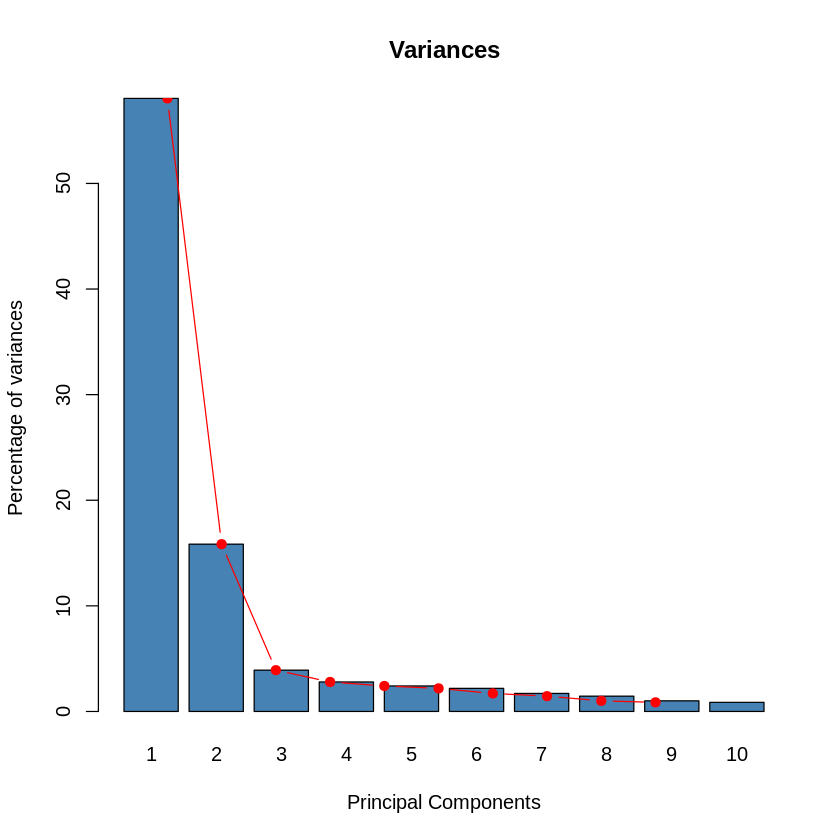

In [47]:
#::GMG::Pintamos el scree plot de las 10 primeras PCs
barplot(eig_meteo_scaled[1:10, 2], names.arg=1:10, 
       main = "Variances",
       xlab = "Principal Components",
       ylab = "Percentage of variances",
       col ="steelblue")
lines(x = 1:10, 
      eig_meteo_scaled[1:10, 2], 
      type="b", pch=19, col = "red")

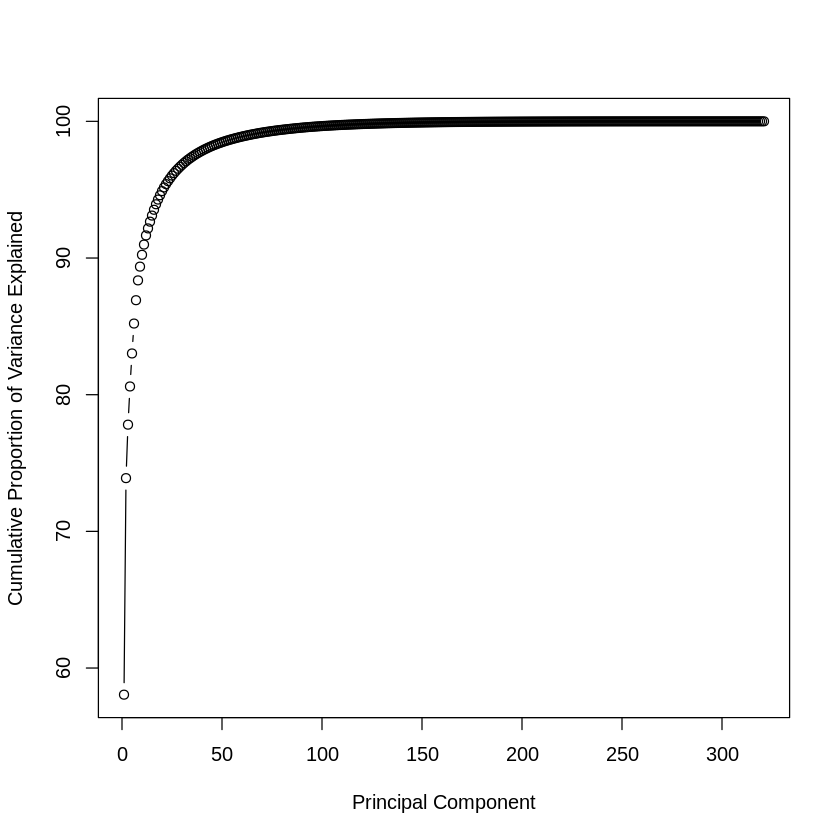

In [48]:
plot(cumsum(variance_scaled), 
            xlab = "Principal Component",
            ylab = "Cumulative Proportion of Variance Explained",
            type = "b")

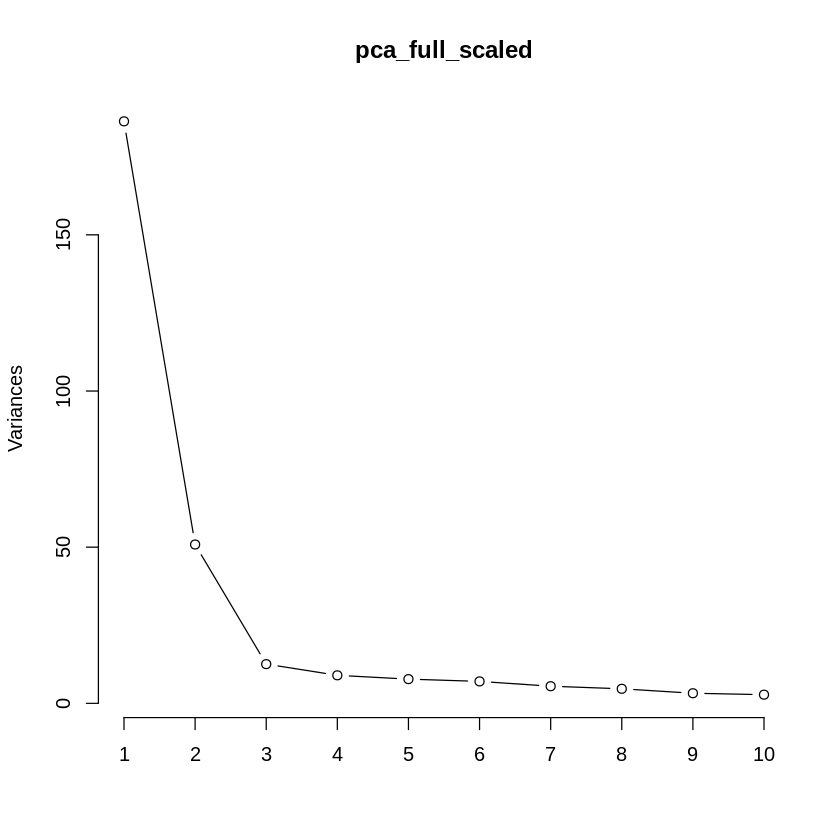

In [49]:
plot(pca_full_scaled, type='l')

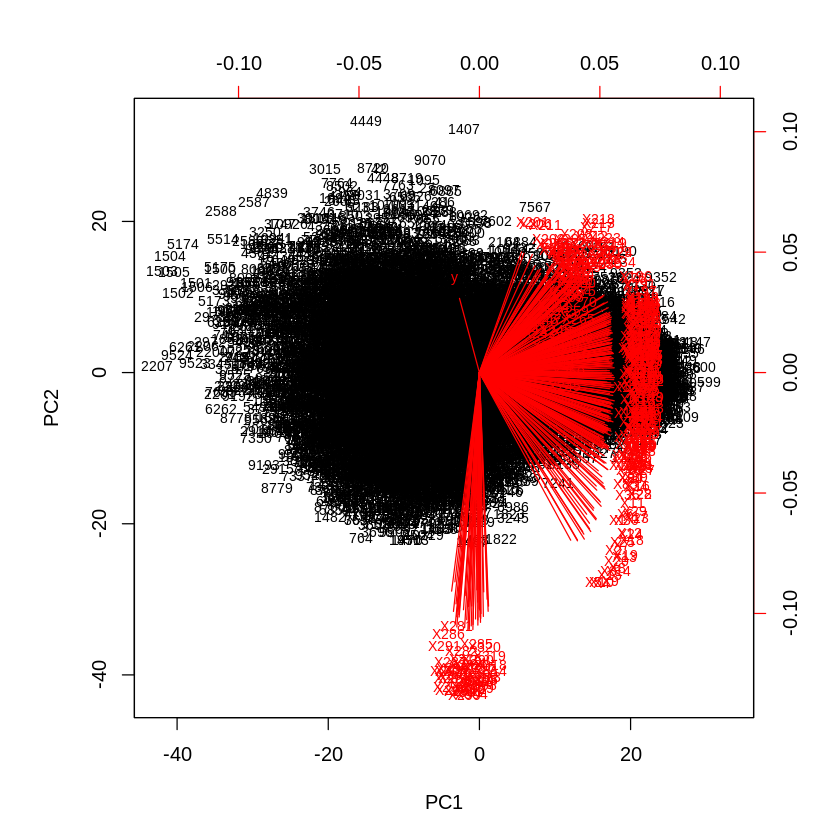

In [51]:
biplot(pca_full_scaled, scale = 0, arrow.len = 0, cex=.7)

* ¿Cómo contribuye en cada caso la variable objetivo a la primera componente principal?

In [ ]:
#::GMG::Contribución de la variable objetivo y a PC1 en porcentaje
var_cor_func <- function(var.loadings, comp.sdev){
  var.loadings*comp.sdev
}

In [98]:
contrib <- function(var.cos2, comp.cos2){
    var.cos2*100/comp.cos2
}

In [99]:
loadings <- pca_full_scaled$rotation
sdev <- pca_full_scaled$sdev

In [100]:
var.coord <- t(apply(loadings, 1, var_cor_func, sdev))
var.cos2 <- var.coord^2
comp.cos2 <- apply(var.cos2, 2, sum)

var.contrib <- t(apply(var.cos2,1, contrib, comp.cos2))
head(var.contrib[, 1:4])

,PC1,PC2,PC3,PC4
y,0.01068821,0.1481743,0.409296737,0.05626072
X1,0.32967378,0.3751500,0.003521151,1.08009249
X2,0.30982013,0.5400883,0.013331685,1.09103897
X3,0.28721888,0.6817707,0.037136982,0.90123571
X4,0.25893709,0.7623370,0.083838768,0.59147460
X5,0.22439603,0.7564979,0.158458134,0.29112473


In [ ]:
pca_full_scaled

* ¿A qué componente principal contribuye principalmente la variable objetivo? ¿qué porcentaje de varianza se explica hasta dicha componente?
* En base a los puntos anteriores, ¿puede considerarse en alguno de los casos que la variable objetivo se "eliminaría" del modelo debido a su contribución a cada una de las componentes principales?
* ¿Cómo se distribuye la contribución de las diferentes variables del espacio original a la primera componente principal? En caso de no estandarizar, ¿puede inferirse alguna relación entre el rango de las variables y su contribución a la primera componente principal?

`Nota 1:` en principio es posible trabajar con el dataset completo sin seleccionar un subconjunto pero si surge algún problema de memoria podéis considerar únicamente los primeros 10 años (~3650 filas).

`Nota 2:` usad las herramientas gráficas vistas durante la práctica para ilustrar los resultados y las conclusiones obtenidas.

In [16]:
#predictora
Y <- meteo_dataset[,1]
#explicativas
X <- meteo_dataset[,-1]

In [23]:
#comprobar que no hay na
which(is.na(X))
which(is.na(Y))

integer(0)

In [25]:
#estandarizado de predictoras
X_s <- scale(X)

In [26]:
#aplico pca
pca <- prcomp(X_s)

In [9]:
class(pca)

[1] "prcomp"

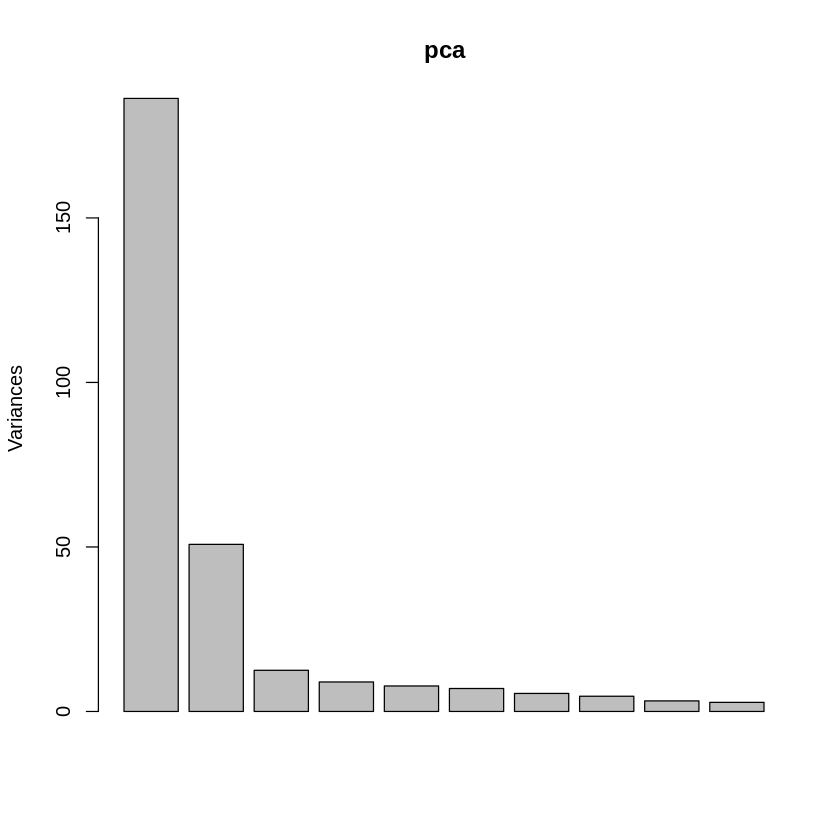

In [27]:
#print(pca)
plot(pca)

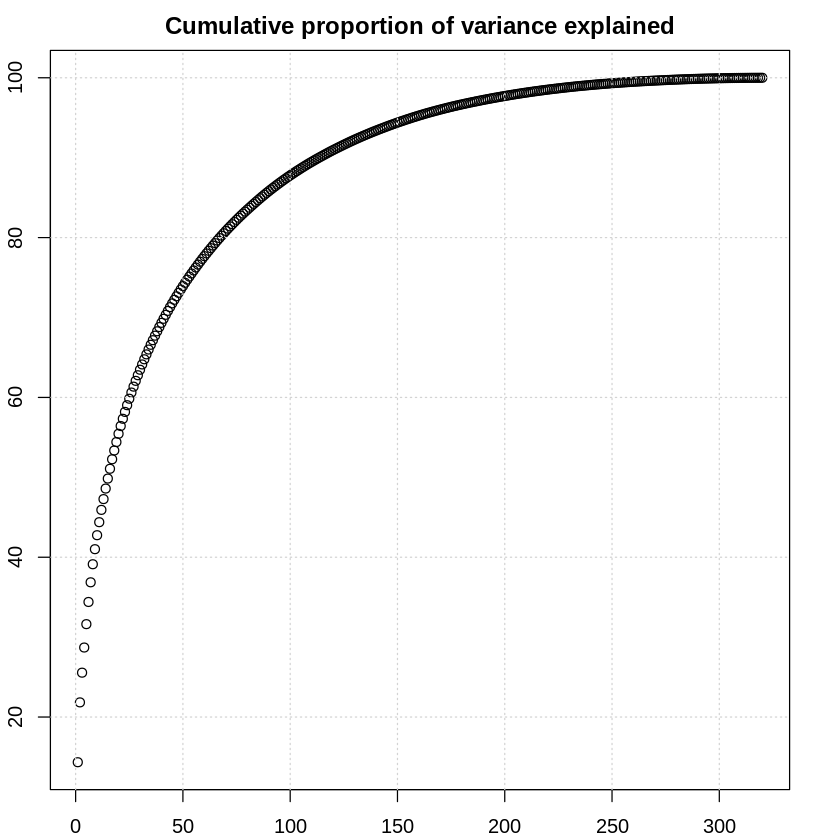

In [28]:
#varianza explicada vs num de cp
par(mfrow=c(1,1), mar=c(2.1,2.1,2.1,2.1))
plot(cumsum(pca$sdev)/sum(pca$sdev)*100,main="Cumulative proportion of variance explained")
grid()
par(mfrow=c(1,1))

In [30]:
#varianza explicada con 70 pcas
var_exp <- cumsum(pca$sdev)/sum(pca$sdev)*100
var_exp[70]

[1] 80.83458

In [31]:
#elegimos
ncp <- 70
X_cp <- pca$x[,1:ncp]

### Punto 2 (3 puntos):

A continuación, consideraremos la serie de precipitación discretizada a partir del valor 1 mm, que es el estándar definido para establecer los días en que ha llovido. El objetivo de este apartado es predecir la ocurrencia de precipitación en Lisboa a partir de los predictores antes definidos. Para ello consideraremos, por un lado, las componentes principales obtenidas estandarizando los datos originales y, por otro lado, el método `KNN`. Dividir la muestra en dos subconjuntos, el primero (20 primeros años) lo utilizaremos para calibrar el modelo y obtener su configuración óptima, mientras que el segundo (10 últimos años) lo utilizaremos como test independiente de cara a comparar diferentes métodos.

* Considerad diferentes umbrales de varianza explicada y el número de PCs asociado (p.e. 40%, 60%, 80% y 90%) y obtend el valor óptimo de `K` en cada caso rastreando valores entre 1 y 15, ¿cómo cambia el valor óptimo? En base a los resultados obtenidos, ¿cuantas PCs considerarías para entrenar el modelo? (`Nota:` ver práctica de `KNN`)
* Para la configuración óptima calibrada con el conjunto de entrenamiento realizad la predicción sobre el conjunto de test y estimad los errores cometidos sobre este conjunto.

### Punto 3 (2 puntos):

Repetid el experimento anterior considerando la precipitación discretizada a partir del valor 20 mm, que es el estándar definido para establecer los días en que ha llovido de forma intensa.

* ¿Cómo cambian los valores óptimos de `K` y de número de PCs? 
* ¿Cómo cambian los errores sobre el conjunto de test en este caso?
* En caso de existir diferentes significativas en ambos casos, ¿a qué crees que puede ser debido? ¿La frecuencia en la muestra del evento a predecir puede influir en la calidad de la predicción?

### Punto 4 (2 puntos):

Considerando el número de PCs óptimo obtenido en el apartado anterior, predecid el conjunto de test utilizando en este caso la regresión logística como método de clasificación (`Nota:` ver `Práctica Clasificacion Lineal` en el Moodle de la asignatura de Estadística o en la de Minería de Datos). 

* Comparad los resultados obtenidos utilizando ambos métodos para la predicción de la ocurrencia de precipitación y de precipitación intensa (`Nota:` considerar, por ejemplo, la curva ROC para la comparación), ¿alguno de los métodos se comporta mejor que el otro de forma sistemática?